In [1]:
# Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data into a DataFrame
data = pd.read_csv('adverts.csv')

In [3]:
data.sample(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
21113,202009053355529,95000.0,60,Silver,Volkswagen,Golf,USED,2010.0,4395,Hatchback,False,Petrol
167042,202010124920412,8500.0,69,Red,Renault,Kadjar,USED,2019.0,17500,SUV,False,Petrol
19587,202010144998023,2800.0,19,Silver,Volkswagen,Polo,USED,2019.0,13390,Hatchback,False,Petrol
74010,202003098186779,100817.0,12,Black,Fiat,Panda,USED,2012.0,1495,Hatchback,False,Petrol
205575,202010285530999,124400.0,59,Blue,Peugeot,308 SW,USED,2009.0,1150,Estate,False,Diesel


In [4]:
# Check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB
None


In [5]:
# Identify quantitative and qualitative features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [6]:
print(data.describe())

       public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06


In [7]:
# Display unique values for categorical features
print(data[categorical_features].nunique())

reg_code               72
standard_colour        22
standard_make         110
standard_model       1168
vehicle_condition       2
body_type              16
fuel_type               9
dtype: int64


In [8]:
# Display summary statistics for numerical features
data.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [9]:
data.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

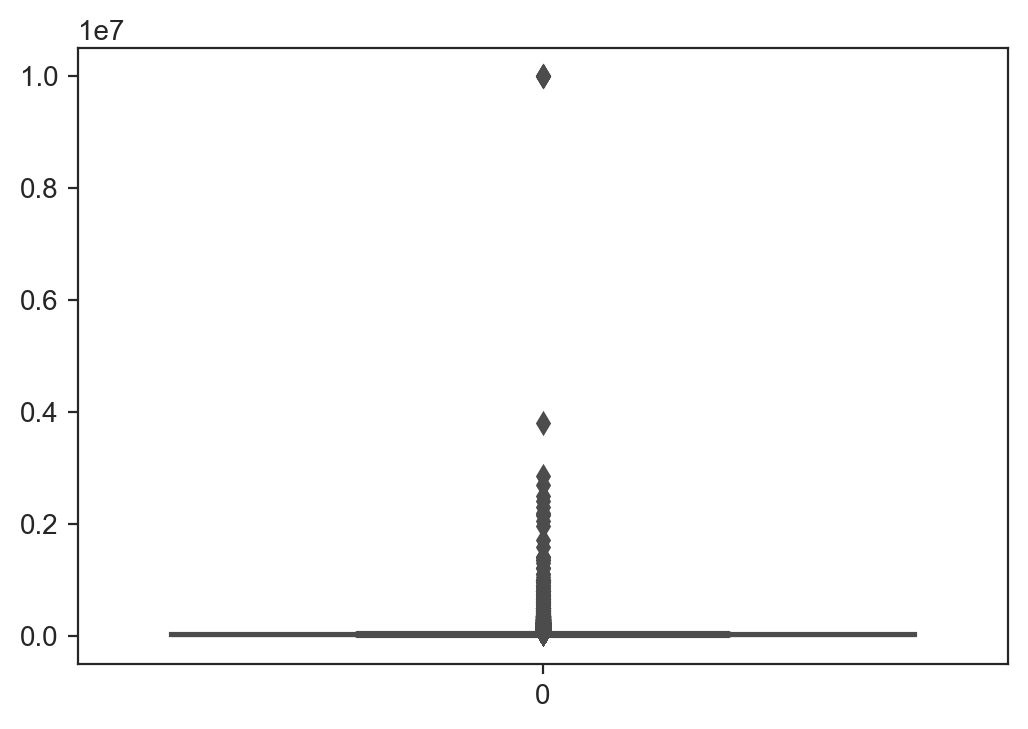

In [10]:
sns.boxplot(data['price'])
plt.show()

# NULL VALUES

In [11]:
# mileage columns add the mean values
data['mileage']= data['mileage'].fillna(data['mileage'].mean())

In [12]:
data.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [13]:
# the null values in year of registration are
mode_features=data['body_type'].mode().iloc[0]
data['body_type'].fillna(mode_features, inplace=True)

In [14]:
# the null values in year of registration are
mode_features=data['fuel_type'].mode().iloc[0]
data['fuel_type'].fillna(mode_features, inplace=True)

In [15]:
# the null values in year of registration are
mode_features=data['standard_colour'].mode().iloc[0]
data['standard_colour'].fillna(mode_features, inplace=True)

In [16]:
data.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31857
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [17]:
data.shape

(402005, 12)

In [18]:
replacement_value = 2021  
data.loc[(data['year_of_registration'].isnull()) &  (data['vehicle_condition'] == 'NEW'), 'year_of_registration'] = replacement_value

# Iterate over  all rows 
for index, row in data.iterrows():
    reg_code = row['reg_code']
    if pd.notna(reg_code):
        if reg_code.isnumeric() and int(reg_code) > 50:
            data.at[index, 'year_of_registration'] = int(reg_code) + 1950
        elif reg_code.isnumeric() and int(reg_code) <= 50:
            data.at[index, 'year_of_registration'] = int(reg_code) + 2000
        else:
            # If 'reg_code' is a letter, delete the row
            data = data.drop(index)

In [19]:
data.shape

(399090, 12)

In [20]:
data.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31857
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration       321
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [21]:
data = data.drop('reg_code', axis=1)

In [22]:
data=data.dropna()

In [23]:
data.isnull().sum()

public_reference         0
mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [24]:
data = data.drop('public_reference', axis=1)

In [25]:
data.isnull().sum()

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [26]:
data.shape

(398769, 10)

In [27]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Handle outliers using IQR for all numerical features
for feature in numeric_columns:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    data_no_outliers = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

In [28]:
data.shape

(398769, 10)

In [29]:
print(data.describe())

             mileage  year_of_registration         price
count  398769.000000         398769.000000  3.987690e+05
mean    37405.454264           2015.592549  1.710014e+04
std     34511.081751              4.038279  2.451756e+04
min         0.000000           1933.000000  1.800000e+02
25%     10359.000000           2014.000000  7.495000e+03
50%     28363.000000           2017.000000  1.269000e+04
75%     56000.000000           2018.000000  2.000000e+04
max    999999.000000           2045.000000  3.799995e+06


# ENCODING

In [41]:
ln = LabelEncoder()
categorical_features = data.select_dtypes(include=['object']).columns
for column in categorical_features:  
    data[column] = ln.fit_transform(data[column])

data['crossover_car_and_van'] = data['crossover_car_and_van'].astype(int)


In [42]:
data['standard_model'].nunique()

990

In [43]:
data.describe()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
count,398769.000000,398769.000000,398769.000000,398769.000000,398769.000000,398769.000000,3.987690e+05,398769.000000,398769.000000,398769.000000
mean,37405.454264,9.890794,55.942603,443.632767,0.921636,2015.592549,1.710014e+04,9.167842,0.004256,4.043860
std,34511.081751,7.815080,31.051218,293.644666,0.268743,4.038279,2.451756e+04,3.318924,0.065096,2.507898
min,0.000000,0.000000,0.000000,0.000000,0.000000,1933.000000,1.800000e+02,0.000000,0.000000,0.000000
25%,10359.000000,2.000000,32.000000,179.000000,1.000000,2014.000000,7.495000e+03,7.000000,0.000000,1.000000
50%,28363.000000,8.000000,59.000000,440.000000,1.000000,2017.000000,1.269000e+04,7.000000,0.000000,6.000000
75%,56000.000000,18.000000,87.000000,667.000000,1.000000,2018.000000,2.000000e+04,13.000000,0.000000,6.000000
max,999999.000000,21.000000,98.000000,989.000000,1.000000,2045.000000,3.799995e+06,15.000000,1.000000,8.000000


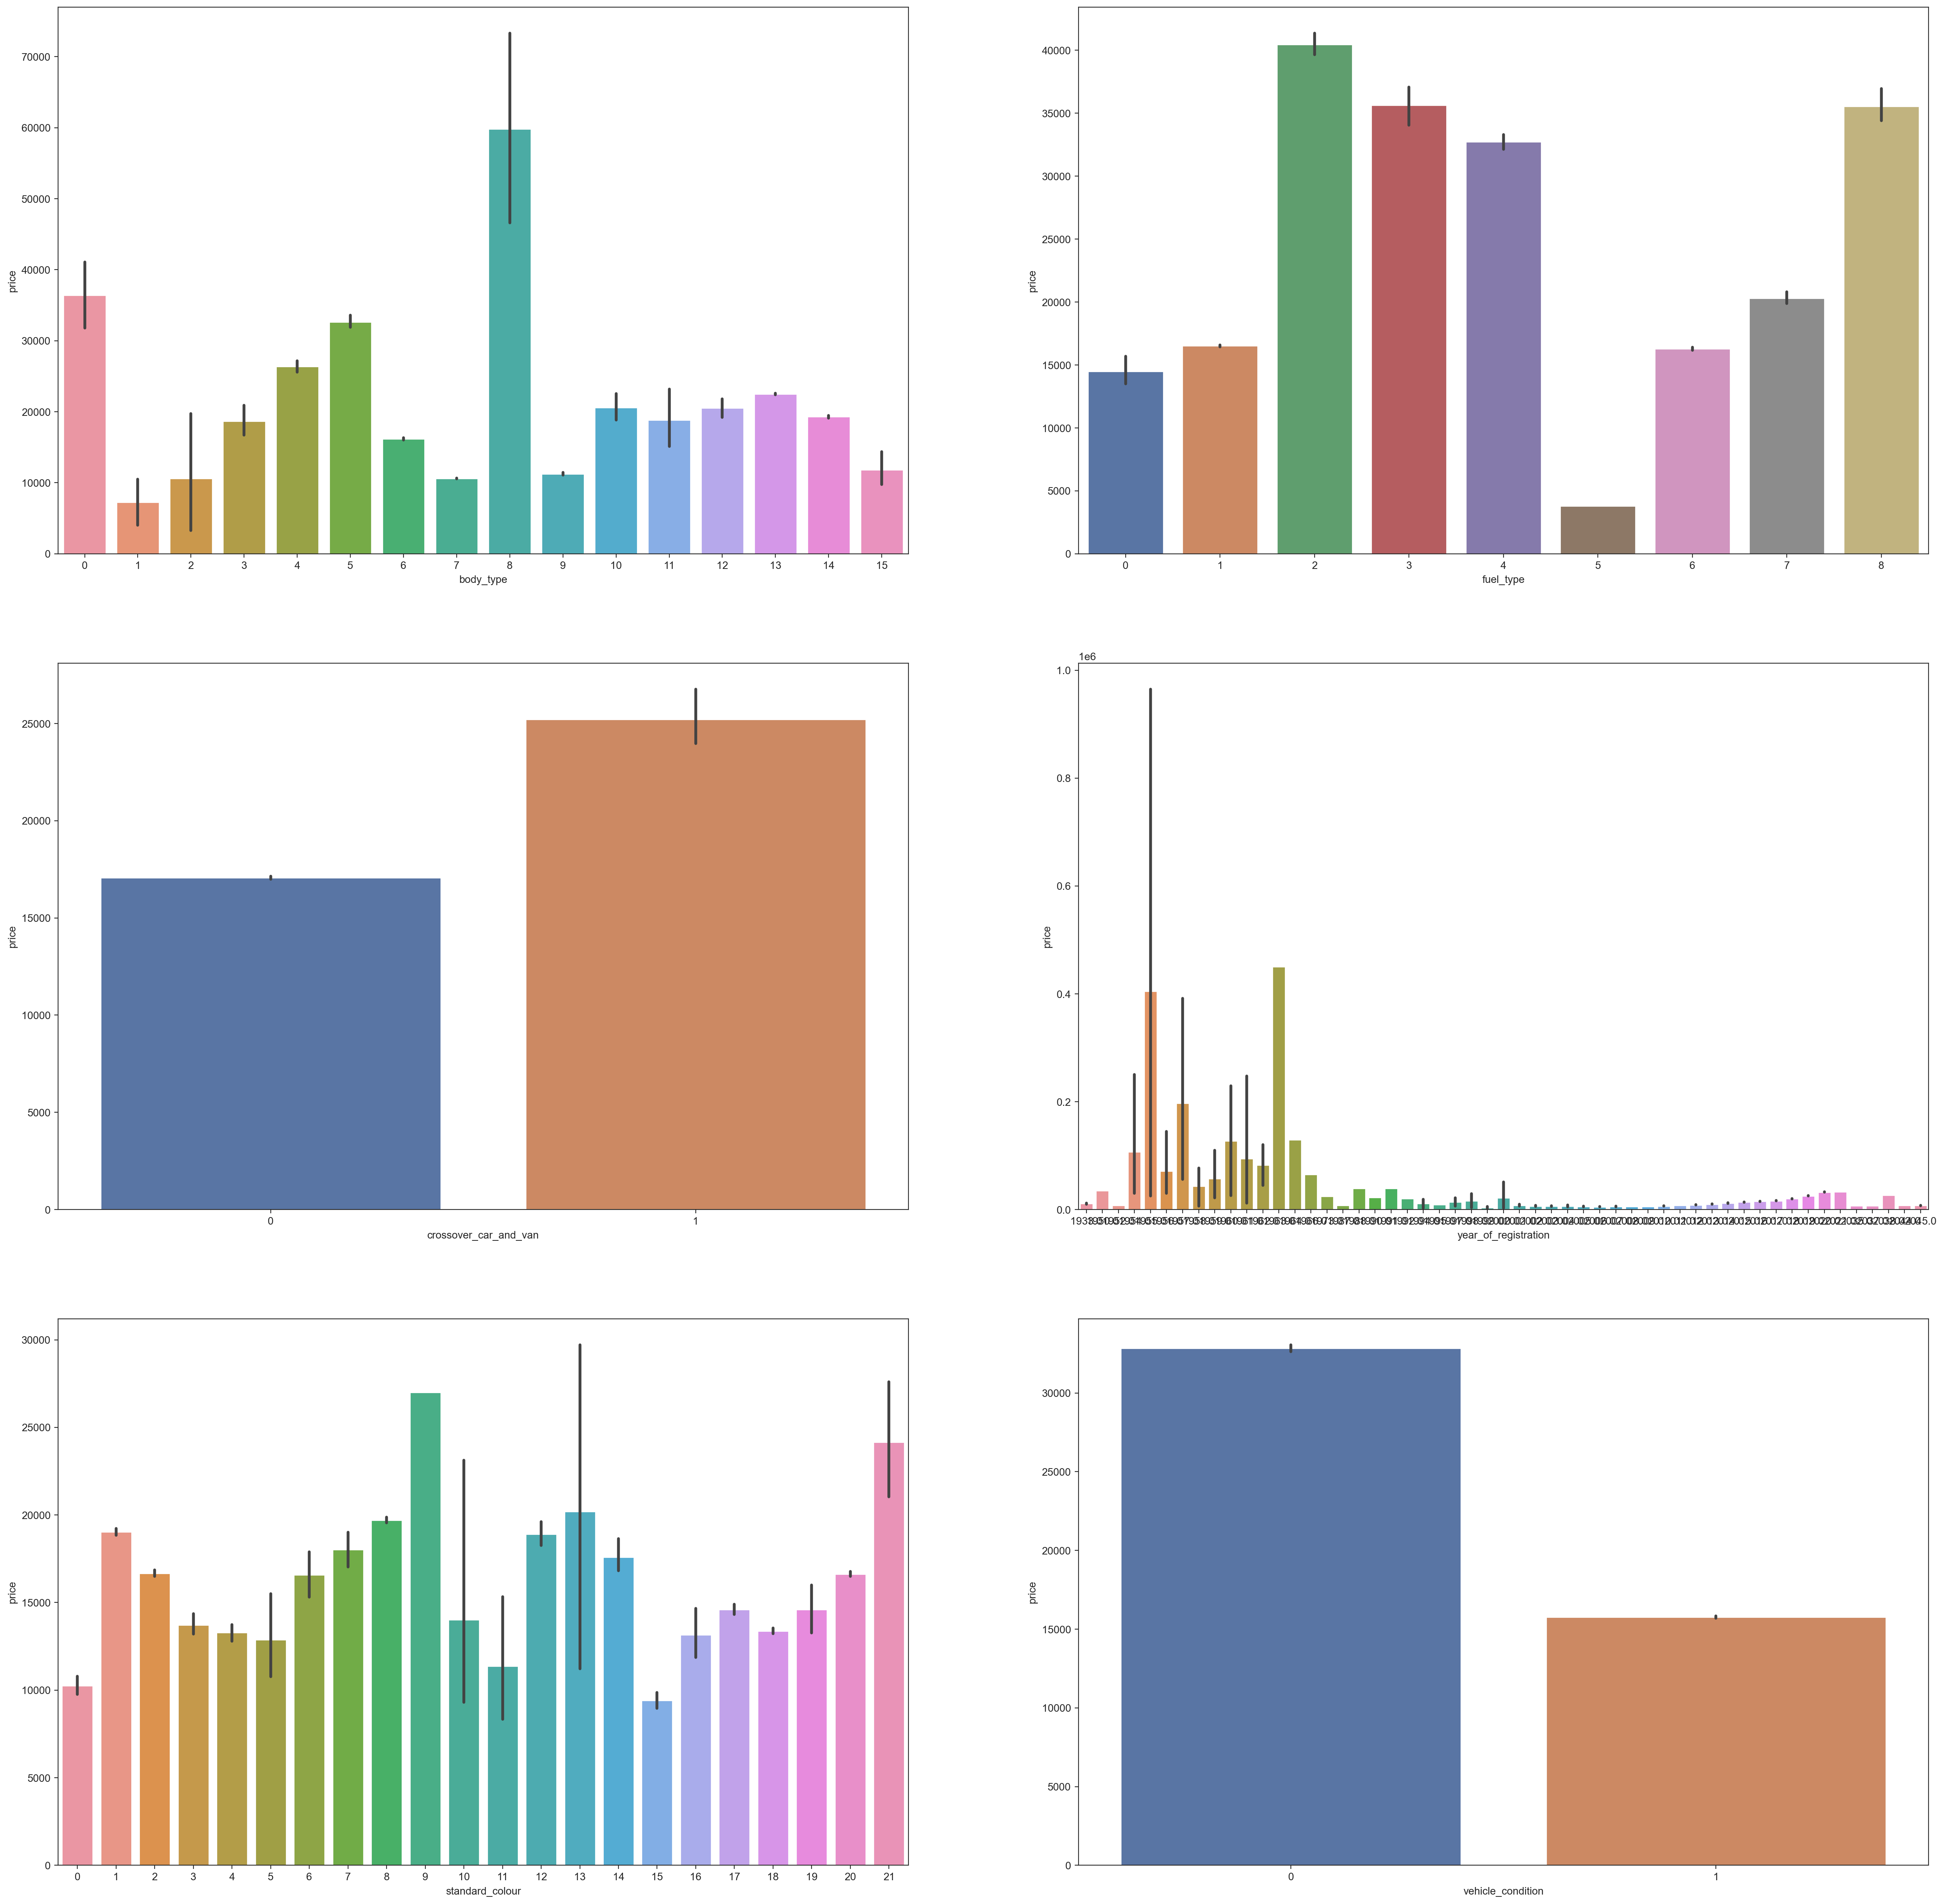

In [44]:
plt.figure(figsize=(32,32))
plt.subplot(3,2,1)
sns.barplot(x='body_type', y='price', data=data)

plt.subplot(3,2,2)
sns.barplot(x='fuel_type', y='price', data=data)

plt.subplot(3,2,3)
sns.barplot(x='crossover_car_and_van', y='price', data=data)

plt.subplot(3,2,4)
sns.barplot(x='year_of_registration', y='price', data=data)

plt.subplot(3,2,5)
sns.barplot(x='standard_colour', y='price', data=data)

plt.subplot(3,2,6)
sns.barplot(x='vehicle_condition', y='price', data=data)
plt.show()

<Axes: xlabel='mileage', ylabel='price'>

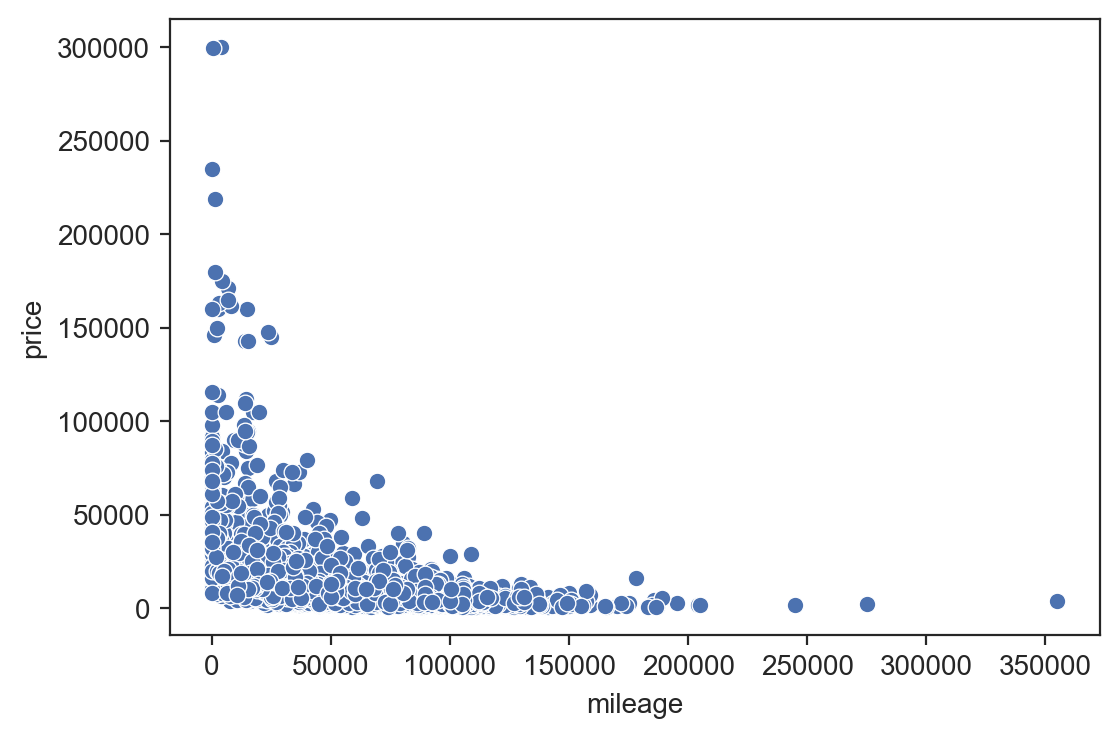

In [45]:
data_demo=data.sample(frac=0.01)
sns.scatterplot(x='mileage', y='price', data=data_demo)

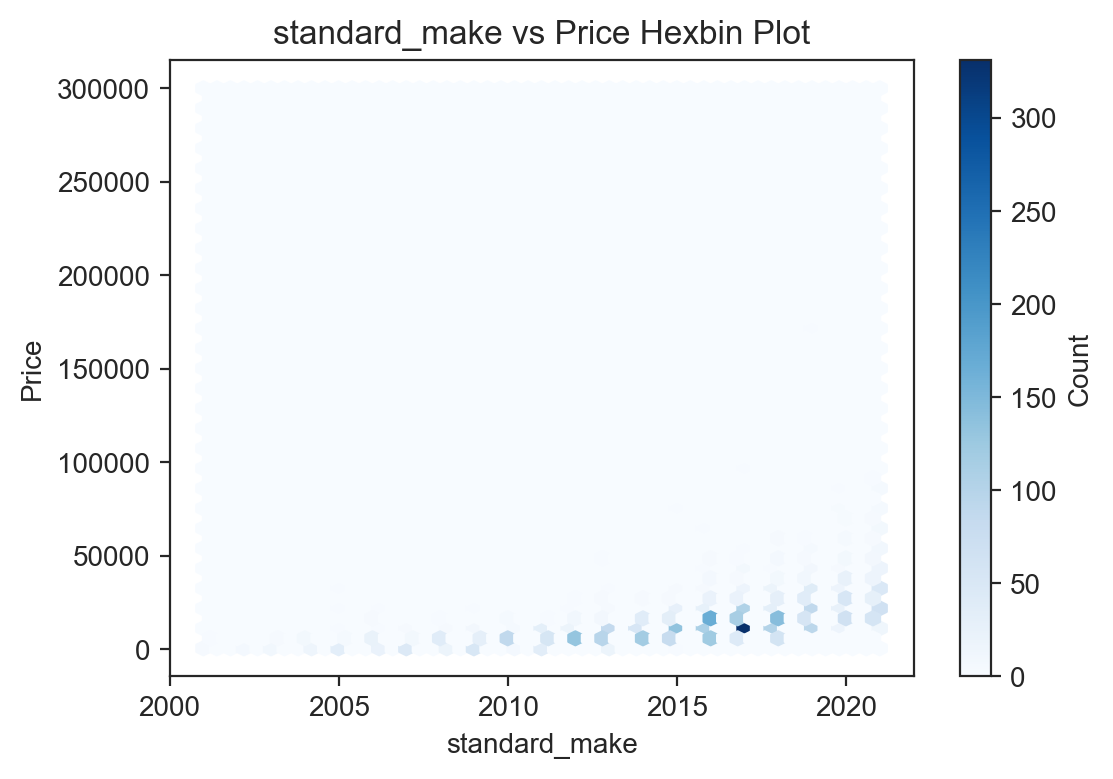

In [46]:
plt.hexbin(data_demo['year_of_registration'], data_demo['price'], gridsize=50, cmap='Blues')
plt.xlabel('standard_make')
plt.ylabel('Price')
plt.title('standard_make vs Price Hexbin Plot')
plt.colorbar(label='Count')
plt.show()

In [47]:
fig = px.scatter(data_demo, x='mileage', y='price', opacity=0.5, title='Mileage vs Price Scatter Plot')
fig.show()

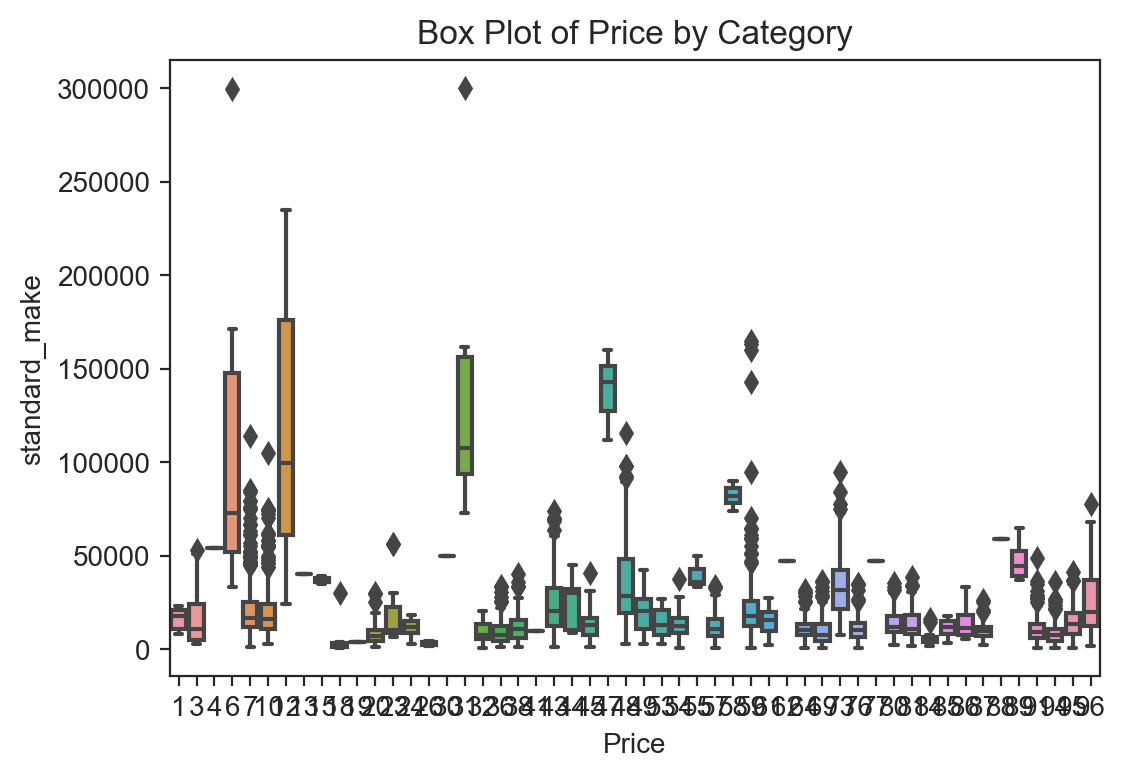

In [48]:
sns.boxplot(x='standard_make', y='price', data=data_demo)
plt.xlabel('Price')
plt.ylabel('standard_make')
plt.title('Box Plot of Price by Category')
plt.show()

In [49]:
# Identify numeric columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Explore correlation matrix
correlation_matrix = data[numerical_features].corr()
print(correlation_matrix)

                       mileage  year_of_registration     price
mileage               1.000000             -0.764062 -0.300894
year_of_registration -0.764062              1.000000  0.288572
price                -0.300894              0.288572  1.000000


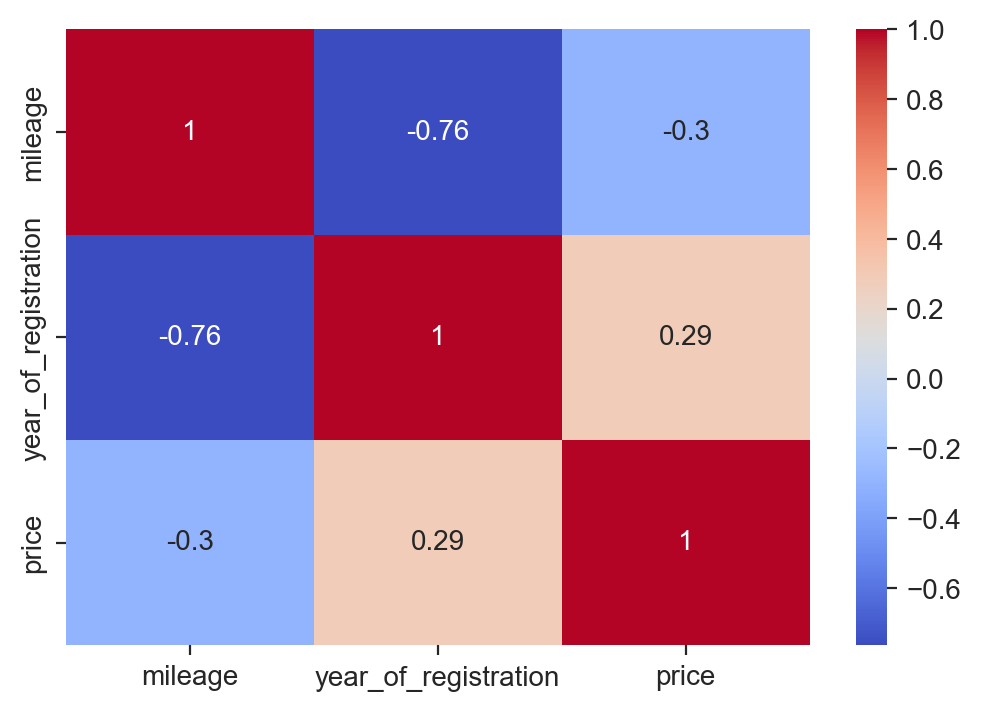

In [50]:
# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# SCALING

In [51]:
scaler_dt= StandardScaler()
data_sc = scaler_dt.fit_transform(data)

# MODEL BUILDING

In [52]:
columns = data.columns  
X = pd.DataFrame(data_sc, columns=columns).drop('price', axis=1)
y = pd.Series(data_sc[:, columns.get_loc('price')])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# KNN

In [53]:
knn_model = KNeighborsRegressor()
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_val)
knn_rmse = mean_squared_error(y_val, knn_predictions, squared=False)
knn_r2 = r2_score(y_val, knn_predictions)
print("KNN RMSE:", knn_rmse)
print("KNN R^2:", knn_r2)

KNN RMSE: 0.6786649072606816
KNN R^2: 0.5468932221095748


In [54]:
# Grid search
knn_param_grid = {'n_neighbors': [3, 5, 7] }
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
knn_best_params = knn_grid_search.best_params_
knn_best_model = knn_grid_search.best_estimator_

In [55]:
print("Best Parameters:", knn_best_params)

Best Parameters: {'n_neighbors': 3}


In [56]:
knn_predictions=knn_best_model.predict(X_test)

In [57]:
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
knn_r2 = r2_score(y_test, knn_predictions)
print("RMSE:",knn_rmse)
print("R2 score:", knn_r2)

RMSE: 0.45479731599912077
R2 score: 0.7188212272134802


In [58]:
#cross validation 
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
knn_cv_rmse = np.sqrt(-knn_cv_scores.mean())

print(f"K-Nearest Neighbors CV RMSE: {knn_cv_rmse}")
print(np.sqrt(-knn_cv_scores))

K-Nearest Neighbors CV RMSE: 0.7079139742921404
[0.88438121 0.64040115 0.8512228  0.58087249 0.50147193]


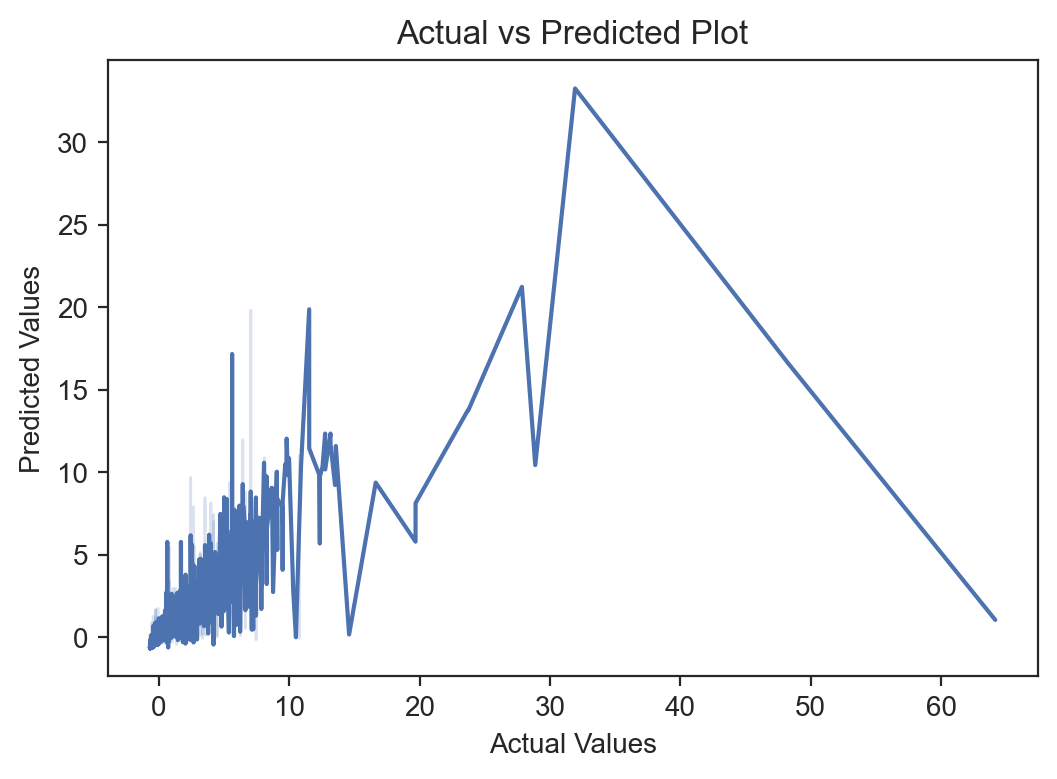

In [59]:
# line plot for actual vs predicted
sns.lineplot(x=y_test, y=knn_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Plot")
plt.show()

# DECISION TREE

In [60]:
dt_model = DecisionTreeRegressor()

dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
tree_predictions = dt_model.predict(X_val)
tree_rmse = mean_squared_error(y_val, tree_predictions, squared=False)
tree_r2 = r2_score(y_val, tree_predictions)
print("\nDecision Tree RMSE:", tree_rmse)
print("Decision Tree R^2:", tree_r2)


Decision Tree RMSE: 0.9546682120797054
Decision Tree R^2: 0.1034083364766496


In [61]:
# grid search
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
dt_best_params = dt_grid_search.best_params_
dt_best_model = dt_grid_search.best_estimator_

In [62]:
print("Best Parameters:", dt_best_params)

Best Parameters: {'max_depth': 20, 'min_samples_split': 10}


In [63]:
dt_predictions=dt_best_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_r2 = r2_score(y_test, dt_predictions)
print("RMSE:",dt_rmse)
print("R2 score:", dt_r2)

RMSE: 0.6018686306342192
R2 score: 0.5075635836986312


In [64]:
#cross validation
dt_cv_scores = cross_val_score(dt_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dt_cv_scores= np.sqrt(-dt_cv_scores)
dt_cv_rmse = dt_cv_scores.mean()
print(dt_cv_scores)
print(f"Decision Tree CV RMSE: {dt_cv_rmse}")

[0.89690051 0.63025059 0.87273265 0.76977841 0.42438979]
Decision Tree CV RMSE: 0.7188103878833156


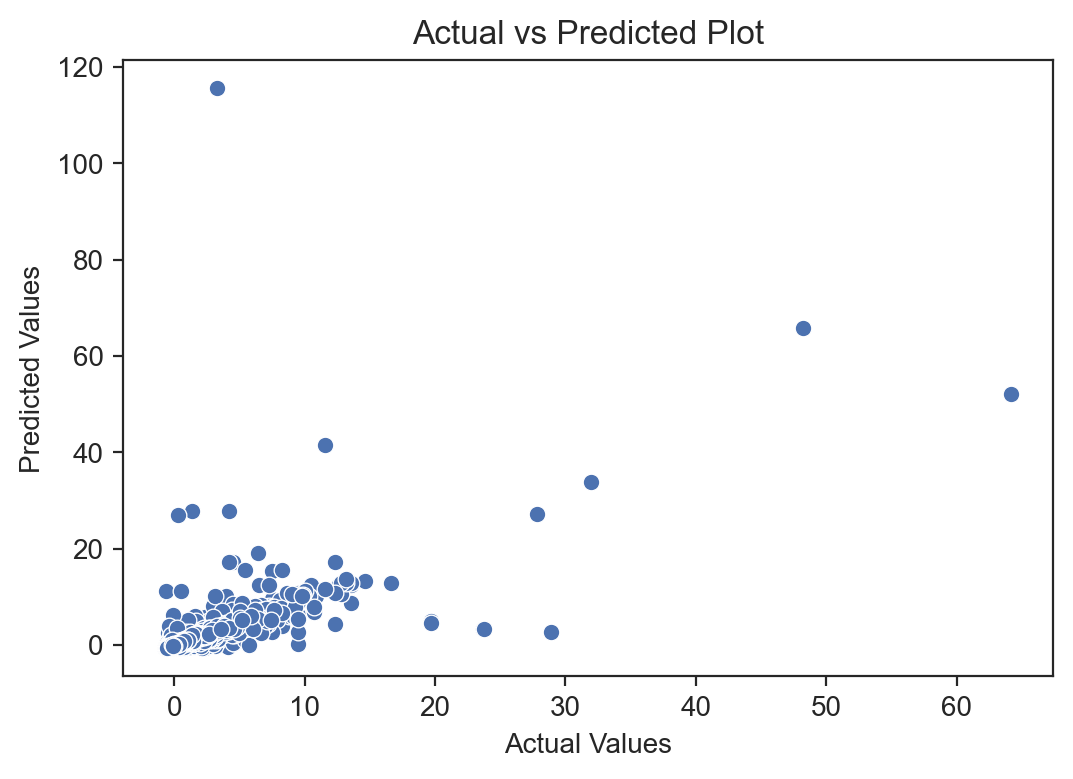

In [58]:
# line plot for actual vs predicted
sns.scatterplot(x=y_test, y=dt_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Plot")
plt.show()

# LINEAR REGRESSION

In [59]:
linear_model = LinearRegression()

linear_model.fit(X_train,y_train)
lr_predictions=linear_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)
print("RMSE:",lr_rmse)
print("R2 score:", lr_r2)


RMSE: 0.7815943952653931
R2 score: 0.16955740295397537


In [60]:
# Perform cross-validation
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = np.sqrt(-cv_scores)
cv_rmse_scores = cv_scores.mean()
print(cv_scores)
print(cv_rmse_scores)

[1.14598286 0.88201147 1.08511561 0.87597555 0.77272399]
0.952361895954645


In [61]:
#NO grid search for Linear regression
linear_model.fit(X_train,y_train)
lr_predictions=linear_model.predict(X_test)

In [62]:
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, dt_predictions)
print("RMSE:",dt_rmse)
print("R2 score:", dt_r2)

RMSE: 0.6018686306342192
R2 score: 0.5075635836986312


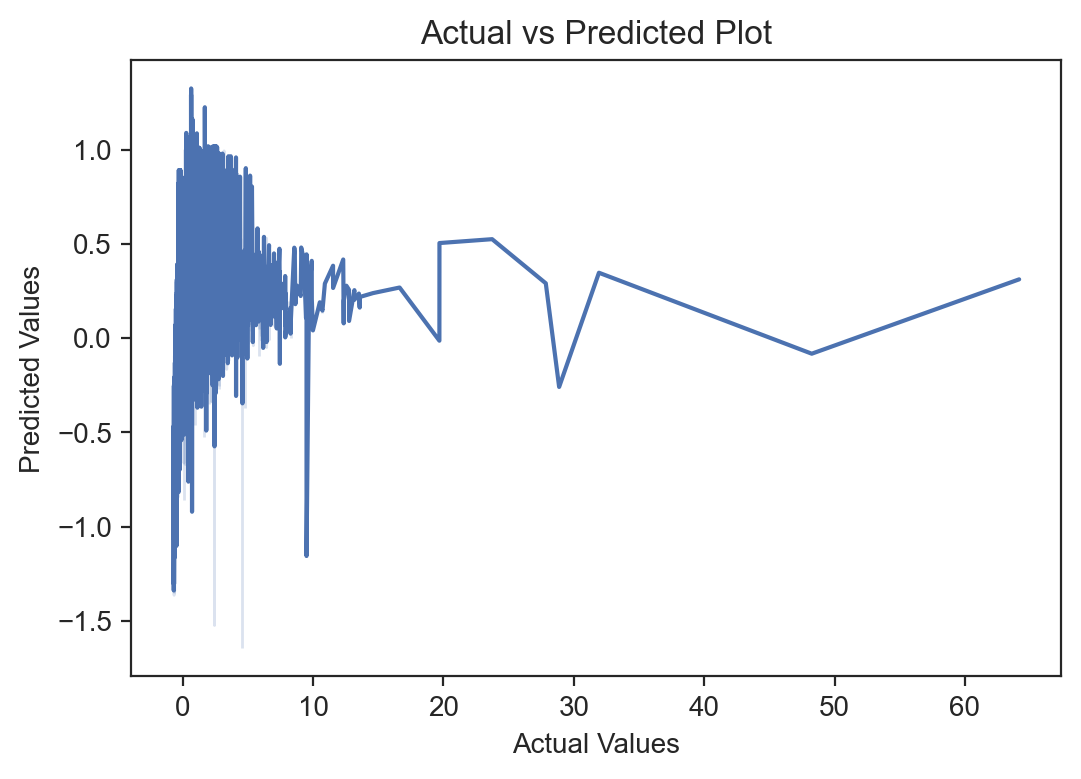

In [63]:
sns.lineplot(x=y_test, y=lr_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Plot")
plt.show()

In [75]:
# Retrieve coefficients and corresponding feature names
coefficients = linear_model.coef_[0]  # Extract the 1-dimensional array
feature_names_scaled = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame to organize coefficients and feature names
coefficients_data = pd.DataFrame({'Coefficient_linear': coefficients}, index=feature_names_scaled)

# Sort the DataFrame by absolute values of coefficients in descending order
coefficients_data = coefficients_data.reindex(coefficients_data['Coefficient_linear'].abs().sort_values(ascending=False).index)

# Print or visualize the coefficients
print(coefficients_data)

                       Coefficient_linear
mileage                         -0.216025
standard_colour                 -0.216025
standard_make                   -0.216025
standard_model                  -0.216025
vehicle_condition               -0.216025
year_of_registration            -0.216025
body_type                       -0.216025
crossover_car_and_van           -0.216025
fuel_type                       -0.216025


In [81]:
coefficients =  dt_best_model.feature_importances_ 
feature_names_scaled = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame to organize coefficients and feature names
coefficients_data = pd.DataFrame({'Coefficient': coefficients}, index=feature_names_scaled)


coefficients_data_dt = coefficients_data.reindex(coefficients_data['Coefficient'].abs().sort_values(ascending=False).index)

# Print or visualize the coefficients
print(coefficients_data)

                       Coefficient
mileage                   0.232808
standard_colour           0.009106
standard_make             0.246952
standard_model            0.237112
vehicle_condition         0.000798
year_of_registration      0.083895
body_type                 0.120568
crossover_car_and_van     0.000976
fuel_type                 0.067786


In [82]:
# Assuming knn_model is your KNN regression model
knn_model.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=0)



In [83]:
feature_importance_knn = result.importances_mean
coefficients_df = pd.DataFrame({'Coefficient': feature_importance_knn}, index=feature_names_scaled)


coefficients_df_knn = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print or visualize the coefficients
print(coefficients_df)
print("Feature Importance for KNN Regression:", feature_importance_knn)

                       Coefficient
mileage                   0.633494
standard_colour           0.064935
standard_make             1.095382
standard_model            1.064238
vehicle_condition         0.087320
year_of_registration      0.421781
body_type                 0.893488
crossover_car_and_van     0.004168
fuel_type                 0.265459
Feature Importance for KNN Regression: [0.63349373 0.0649353  1.09538172 1.06423833 0.08732042 0.42178119
 0.89348772 0.0041681  0.26545893]


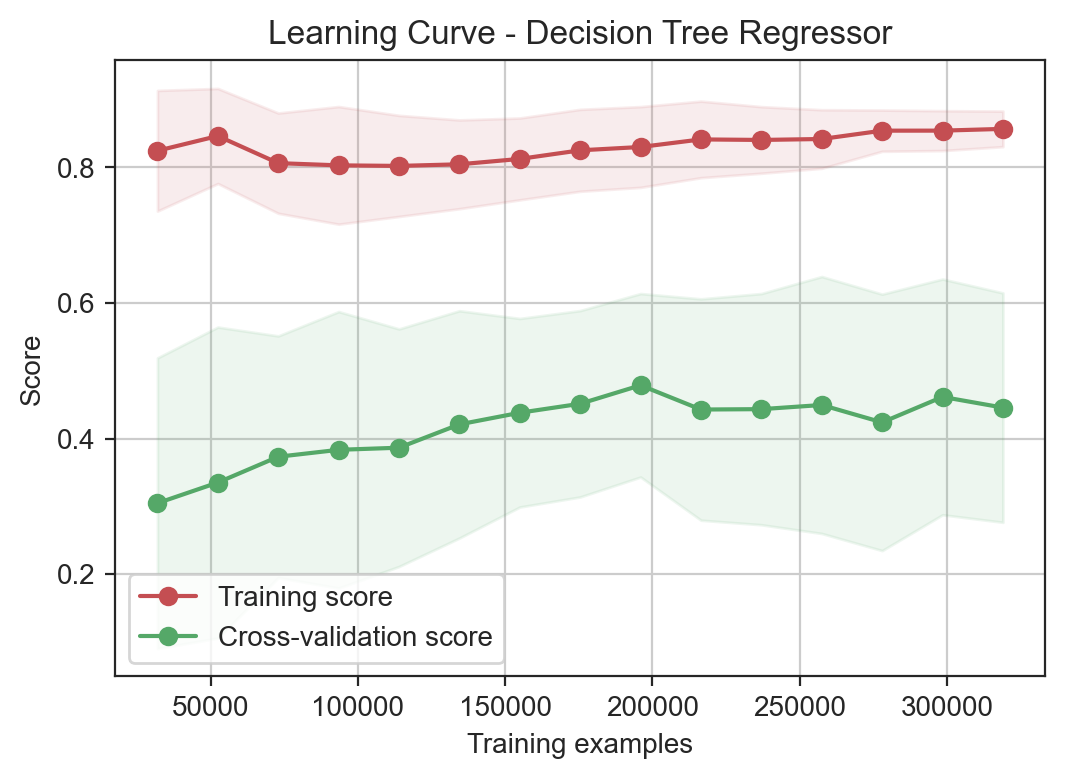

In [ ]:
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 15)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



# Decision Tree Regressor
title = "Learning Curve - Decision Tree Regressor"

plot_learning_curve(dt_best_model, title, X, y, cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0))
plt.show()

# k-Nearest Neighbors Regressor
title = "Learning Curve - k-Nearest Neighbors Regressor"

plot_learning_curve(knn_best_model, title, X, y, cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=0))
plt.show()

# Linear Regression
title = "Learning Curve - Linear Regression"

plot_learning_curve(linear_model, title, X, y, cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=0))
plt.show()


In [ ]:
#model = DecisionTreeClassifier()
dt_best_model.fit(X_train, y_train)

# Access feature importances
feature_importances = dt_best_model.feature_importances_
print(feature_importances)
# # Visualize feature importances
# plt.bar(range(len(feature_importances)), feature_importances, tick_label=X_train.columns)
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.title("Decision Tree Feature Importance")
# plt.show()

In [ ]:
knn_best_model.fit(X_train, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(knn_best_model, X_test, y_test, n_repeats=30, random_state=42)

In [ ]:
plt.bar(range(len(perm_importance.importances_mean)), perm_importance.importances_mean, tick_label=X_train.columns)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("KNN Permutation Feature Importance")
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
y_pred_lr = linear_model.predict(X_test)
# Calculate residuals
residuals = y_test - y_pred_lr
# Visualize residual plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Linear Regression Model")


plt.subplot(3,1,2)
y_pred_dt = dt_best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_dt

# Visualize residual plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for decision tree R Model")

plt.subplot(3,1,3)
y_pred_knn = knn_best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_knn

# Visualize residual plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for KNNR Model")
plt.show()

In [ ]:
y_pred_lr = linear_model.predict(X_test)
# Calculate residuals
residuals = y_test - y_pred_lr
# Visualize residual plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Linear Regression Model")

In [ ]:
y_pred = dt_best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize residual plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for decision tree Regression Model")
plt.show()

In [ ]:
y_pred = knn_best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize residual plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for KNN Regression Model")
plt.show()

In [ ]:
# Assuming model is your classification model
y_pred = knn_best_model.predict(X_test)

# Create a DataFrame with actual and predicted labels
prediction_analysis = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Correct': y_test == y_pred})

# Display instances where the model made errors
misclassified_instances = prediction_analysis[prediction_analysis['Correct'] == False]
print(misclassified_instances)


In [ ]:
# Assuming model is your classification model
y_pred = dt_best_model.predict(X_test)

# Create a DataFrame with actual and predicted labels
prediction_analysis = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Correct': y_test == y_pred})

# Display instances where the model made errors
misclassified_instances = prediction_analysis[prediction_analysis['Correct'] == False]
print(misclassified_instances)

In [ ]:
# Visualization of individual instances
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o')
plt.scatter(range(len(y_test)), y_pred, label='Predicted', marker='x')
plt.xlabel("Instance Index")
plt.ylabel("Class Label")
plt.title("Individual Prediction Plot for Classification Model")
plt.legend()
plt.show()